In [19]:
from matplotlib import pyplot as plt
from pandas import read_excel
import seaborn as sb
import datetime as dt
import numpy as np
import sys

In [20]:
df = read_excel("https://data.hossam.kr/D01/mpg.xlsx")
df

,id,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [21]:
plt.rcParams['font.family'] = "AppleGothic" if sys.platform == "darwin" else "Malgun Gothic"
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (15, 5)
plt.rcParams['axes.unicode_minus'] = False

문제7
철수는 새로 자동차를 구입하고자 한다.

좋은 자동차를 구입하는데 있어서 가장 중요시 되는 조건은 평균연비이다.

- 데이터 전처리 요구사항
- 데이터 프레임에 평균연비에 대한 파생변수를 생성하시오.
- 전체 평균연비에 대한 평균값을 구하고 이 평균값보다 - 평균연비가 높은 경우 'Pass', 그렇지 않을 경우 'Fail'로 - 표시할 수 있는 파생변수를 평가라는 이름으로 추가하시오.
- 평균연비에 대한 백분율을 구한 후 90점 이상일 경우 A, 
- 80점 이상일 경우 B, 70점 이상일 경우 C, 그 외의경우는D로 하여 등급이라는 컬럼을 추가하시오.
- 다음의 네가지 지표를 확인할 수 있는 서브플롯을 제시하라

- 자동차 구동방식별 평가에 대한 빈도
- 자동차 구동방식별 등급에 대한 빈도
- 자동차 연료 종류 평가에 대한 빈도
- 자동차 연료 종류 등급에 대한 빈도
- 자동차 분류별 평가에 대한 빈도
- 자동차 분류별 등급에 대한 빈도

In [27]:
# displ 배기량, cty 도심연비, hwy 고속도로 연비
import numpy
df1 = df.copy()

df1['평균연비'] = (df.loc[:, 'cty'] + df.loc[:, 'hwy'])/2
# print(df1.describe())
# 평균연비 약 20.1
# % = 전체값 * n% / 100
df1['평가'] = numpy.where(df1['평균연비'] >=20.1, 'pass', 'fail')
print(df1)
persent = []
for i in df1['평균연비']:
    persent.append((i/234)*100)
print(persent)
df1['백분율'] = persent


               id       displ         year         cyl         cty  \
count  234.000000  234.000000   234.000000  234.000000  234.000000   
mean   117.500000    3.471795  2003.500000    5.888889   16.858974   
std     67.694165    1.291959     4.509646    1.611534    4.255946   
min      1.000000    1.600000  1999.000000    4.000000    9.000000   
25%     59.250000    2.400000  1999.000000    4.000000   14.000000   
50%    117.500000    3.300000  2003.500000    6.000000   17.000000   
75%    175.750000    4.600000  2008.000000    8.000000   19.000000   
max    234.000000    7.000000  2008.000000    8.000000   35.000000   

              hwy        평균연비  
count  234.000000  234.000000  
mean    23.440171   20.149573  
std      5.954643    5.050290  
min     12.000000   10.500000  
25%     18.000000   15.500000  
50%     24.000000   20.500000  
75%     27.000000   23.500000  
max     44.000000   39.500000  
      id manufacturer   model  displ  year  cyl       trans drv  cty  hwy fl  \
0

In [23]:
conditions = [ (df1['백분율']>= 9), #'A',
               (df1['백분율'] >= 8), #'B',
               (df1['백분율'] >= 7), #'C' 
             ]
value = ["A", "B", "C"]
df1['등급'] = numpy.select(conditions, value, default='F')
df1

# df1['등급'] = numpy.where(df1['평균연비'] >=20.1, 'pass', 'fail')

,id,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,평균연비,평가,백분율,등급
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,pass,10.042735,A
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,pass,10.683761,A
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,pass,10.897436,A
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,pass,10.897436,A
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,pass,8.974359,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5,pass,10.042735,A
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0,pass,10.683761,A
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0,pass,8.974359,B
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0,pass,9.401709,A


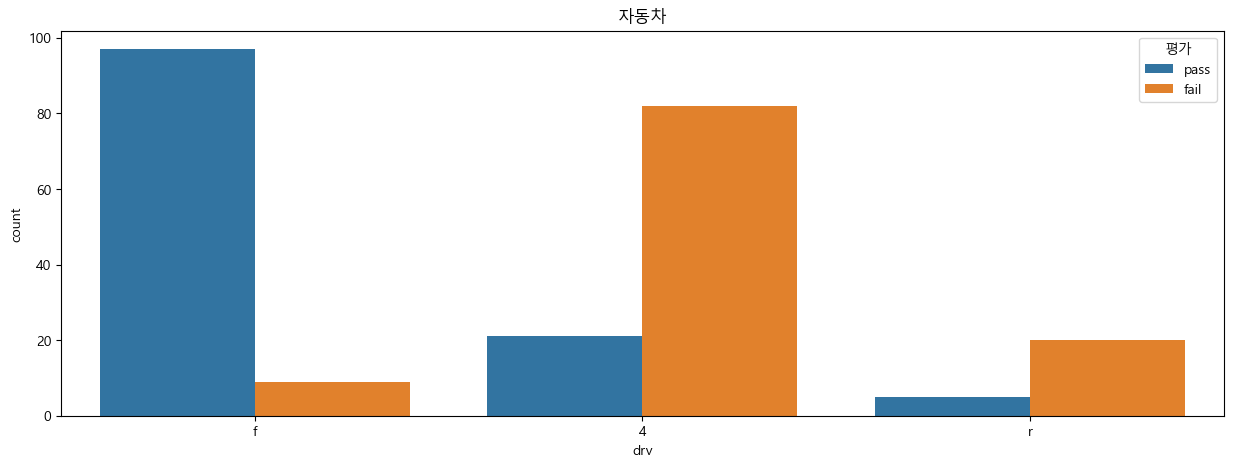

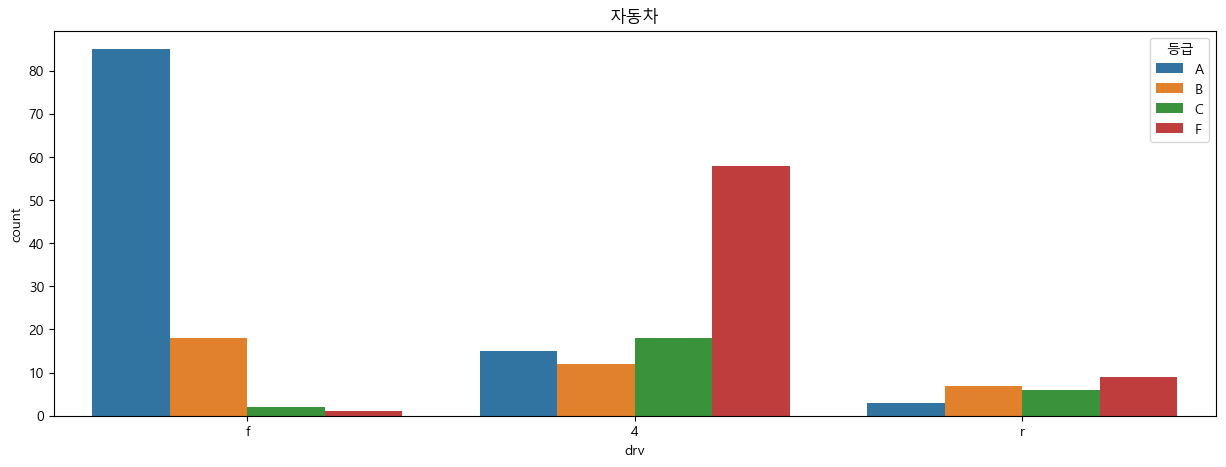

In [24]:
# drv 자동차 구동방식
# 연료 종류 fl     분류 class
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 7))

sb.countplot(data=df1, x="drv", hue='평가')
plt.title("자동차")
plt.show()
plt.close()

sb.countplot(data=df1, x="drv", hue='등급')
plt.title("자동차")
plt.show()
plt.close()

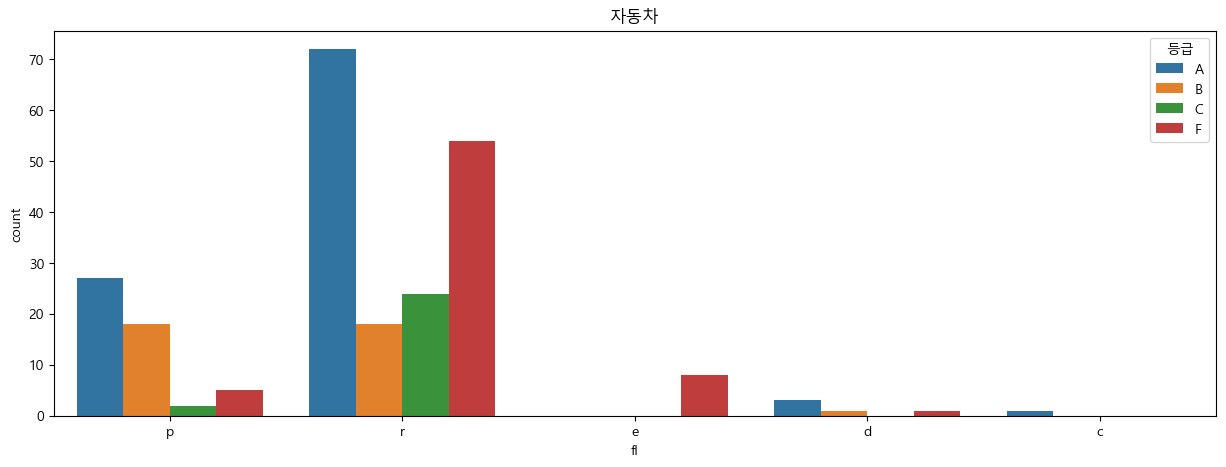

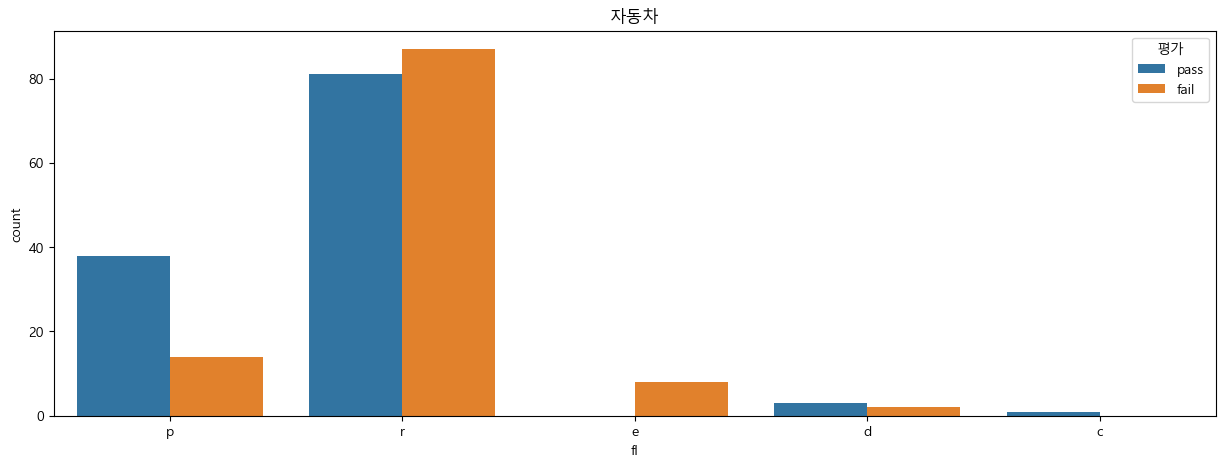

In [25]:
sb.countplot(data=df1, x="fl", hue='등급')
plt.title("자동차")
plt.show()
plt.close()

sb.countplot(data=df1, x="fl", hue='평가')
plt.title("자동차")
plt.show()
plt.close()

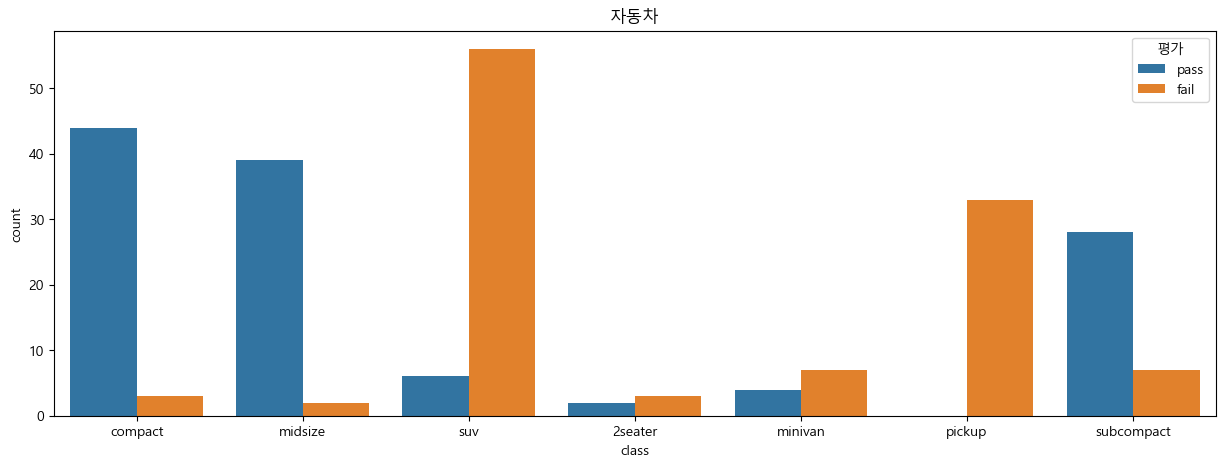

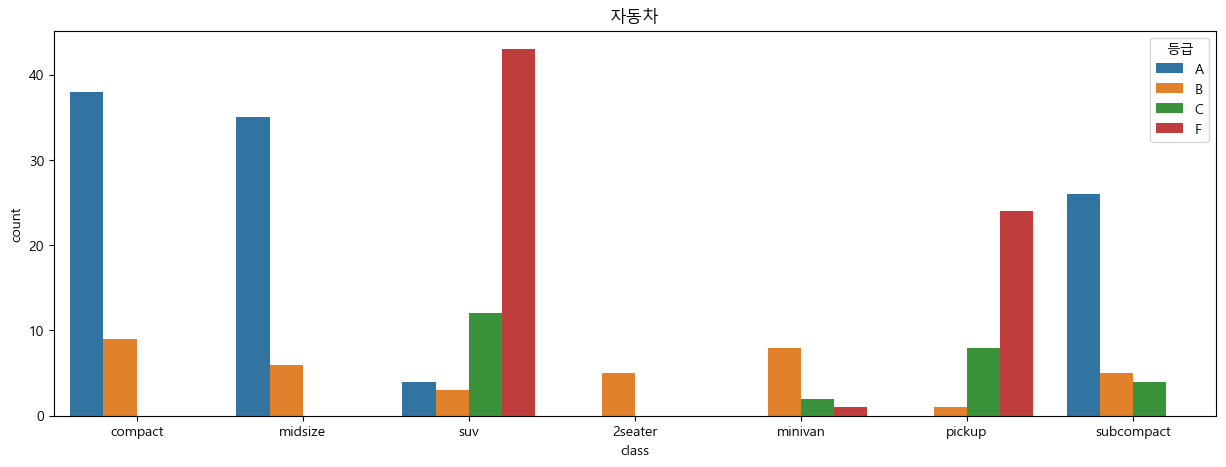

In [26]:
sb.countplot(data=df1, x="class", hue='평가')
plt.title("자동차")
plt.show()
plt.close()

sb.countplot(data=df1, x="class", hue='등급')
plt.title("자동차")
plt.show()
plt.close()